<a href="https://colab.research.google.com/github/Pranav-Nirbhavane/Bulldozer-Price-Prediction/blob/main/end_to_end_bulldozer_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚜 **Predicting the sale price of bulldozer using Machine Learning :**

In this notebook, we are going through an example machine learning project with the goal of predicting the sale price of bulldozers.

**1. Problem Defination**
> Predict the auction sale price for a piece of heavy equipment to createa a 'blue book' for bulldozers.

**2. Data**

> The data is downloaded from the kaggle Bluebook for bulldozers competition:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

> For this competition, you are predicting the sale price of bulldozers sold at auctions.

> The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

**3. Evaluation**
> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation for the project check the below link.

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error.

**4. Features**

Kaggle provides a data dictionary detailing all of the features of the dataset.


In [ ]:
# Import all modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import training and validation sets
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/scikitlearn/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv')
df

<ipython-input-2-91c4c7a1c368>:2: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/scikitlearn/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv')


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,265194
UsageBand,339028
saledate,0


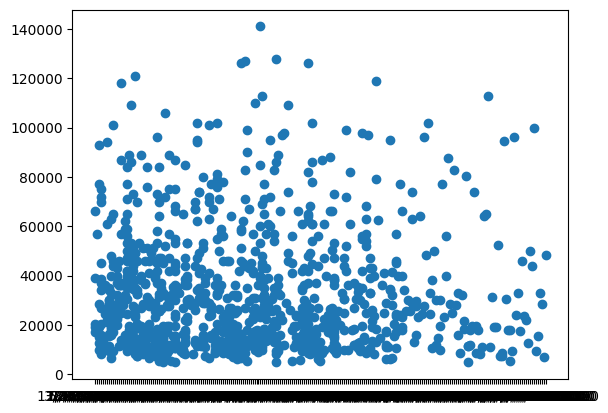

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [ ]:
df['saledate']

,saledate
0,11/16/2006 0:00
1,3/26/2004 0:00
2,2/26/2004 0:00
3,5/19/2011 0:00
4,7/23/2009 0:00
...,...
412693,3/7/2012 0:00
412694,1/28/2012 0:00
412695,1/28/2012 0:00
412696,3/7/2012 0:00


<Axes: ylabel='Frequency'>

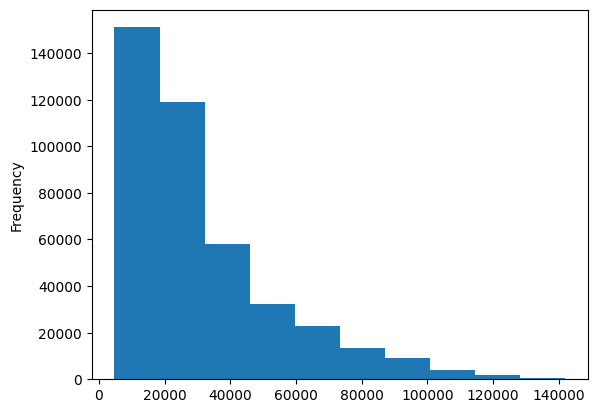

In [ ]:
df.SalePrice.plot.hist()

# **Parsing dates**

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the '**parse_dates**' parameter.

Converted the saledate column from object to datetime[64]

In [ ]:
# Import data again but this time parse dates
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/scikitlearn/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv',
                 parse_dates=['saledate'])

<ipython-input-8-be001859f4c1>:2: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/scikitlearn/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv',


In [ ]:
df['saledate'][:1000]

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
...,...
995,2009-07-16
996,2007-06-14
997,2005-09-22
998,2005-07-28


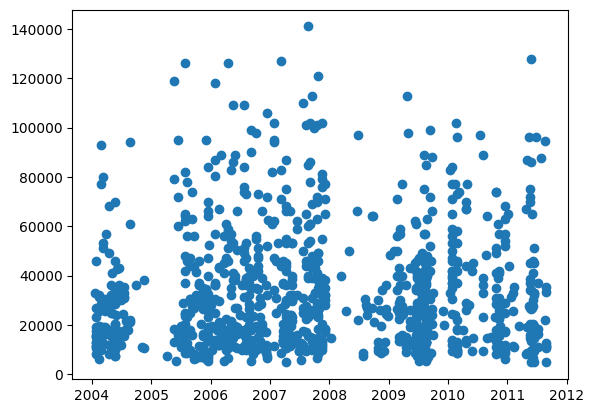

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],
           df['SalePrice'][:1000])

In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [ ]:
df.saledate.head(20)

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
5,2008-12-18
6,2004-08-26
7,2005-11-17
8,2009-08-27
9,2007-08-09


**NOTE: Sort dataframe by saledate**

When working with time series data, its good idea to sort it by date.

In [ ]:
# Sort dataframe in date order
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head(20)

,saledate
205615,1989-01-17
274835,1989-01-31
141296,1989-01-31
212552,1989-01-31
62755,1989-01-31
54653,1989-01-31
81383,1989-01-31
204924,1989-01-31
135376,1989-01-31
113390,1989-01-31


**Make a copy of the original dataframe**

We make a copy of the original dataframe so when we manipulate the copy, we have still got out original data.

In [ ]:
# Make a copy
df_tmp = df.copy()

**Add datetime parameters for ' *saledate* ' column**

In [ ]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [ ]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [ ]:
# Now that we have enriched our DataFrame with date time features we can remove the saledate column
df_tmp.drop('saledate', axis=1, inplace=True)

In [ ]:
# Check the values of different columns
df_tmp['state'].value_counts()

,count
state,
Florida,67320
Texas,53110
California,29761
Washington,16222
Georgia,14633
Maryland,13322
Mississippi,13240
Ohio,12369
Illinois,11540


# **5. Modelling**

We have done enough EDA ( we could always do more ) but lets start to do some model-driven EDA.

**Convert string to categories**

One way we can turn all of our data into numbers is by converting them into pandas categories.

https://pandas.pydata.org/docs/reference/api/pandas.api.types.pandas_dtype.html

In [ ]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

False

In [ ]:
# Find the columns which contain strings
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [ ]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype('category').cat.as_ordered()

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [ ]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [ ]:
pd.api.types.is_object_dtype(df_tmp['UsageBand'])

True

In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_object_dtype(content):
    print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# Convert the obj dtypes to numeric value
for label,content in df_tmp.items():
  if pd.api.types.is_object_dtype(content):
    df_tmp[label] = content.astype('category').cat.as_ordered()

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [ ]:
df_tmp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,265194
UsageBand,339028
fiModelDesc,0


# **Filling missing values**

**Fill numerical missing values first**

In [ ]:
# Check for numeric value dtypes in df
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [ ]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label, df[label].isna().sum())

auctioneerID 20136
MachineHoursCurrentMeter 265194


In [ ]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column which tels us if the data was missing
      df_tmp[label + '_is_missing'] = pd.isnull(content)
      # Fill missing numeric values with median
      df_tmp[label] = content.fillna(content.median())

In [ ]:
df_tmp.auctioneerID_is_missing.value_counts()

,count
auctioneerID_is_missing,
False,392562
True,20136


**Filling and turning categorical variables into numbers**

In [ ]:
# Check for columns which arent numeric
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add a binary column to indicate whether sample had missing value
    df_tmp[label + '_is_missing'] = pd.isnull(content)
    # Turn categories into number and add +1
    df_tmp[label] = pd.Categorical(content).codes + 1

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(5), int32(5), int64(5), int8(39)
memory usage: 73.6 MB


In [ ]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [ ]:
df_tmp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
...,...
Backhoe_Mounting_is_missing,0
Blade_Type_is_missing,0
Travel_Controls_is_missing,0
Differential_Type_is_missing,0


**Now that all of the data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning models.**

In [ ]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
%%time
# Instantiate model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
# Fit the model
model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

CPU times: user 20min 58s, sys: 8.36 s, total: 21min 7s
Wall time: 12min 51s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
model.score(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

0.9875495040871494

# **Splitting data into train/validation sets**

In [ ]:
df_tmp.saleYear.value_counts()

,count
saleYear,
2009,43849
2008,39767
2011,35197
2010,33390
2007,32208
2006,21685
2005,20463
2004,19879
2001,17594


In [ ]:
# Split the data into training and validation
df_val = df_tmp[df_tmp['saleYear'] == 2012]
df_train = df_tmp[df_tmp['saleYear'] != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [ ]:
# Split data into X & y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

# **Building an evaluation function**

In [ ]:
# Create evaluation function ( the competition uses RMSLE)
from sklearn.metrics import root_mean_squared_log_error, mean_absolute_error, r2_score

# Create function to evaluate model on a few different levels
def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)
  scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
            'Validation MAE': mean_absolute_error(y_valid, val_preds),
            'Training RMSLE': root_mean_squared_log_error(y_train, train_preds),
            'Validation RMSLE': root_mean_squared_log_error(y_valid, val_preds),
            'Training R2': r2_score(y_train, train_preds),
            'Validation R2': r2_score(y_valid, val_preds)}
  return scores

# **Testing our model on a subset (to tune the hyperparameters)**

In [ ]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [ ]:
%%time
# Cutting down on the max number of samples each estimator can see improved training time
model.fit(X_train, y_train)

CPU times: user 41.8 s, sys: 434 ms, total: 42.3 s
Wall time: 25.5 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [ ]:
show_scores(model)

{'Training MAE': 5561.396858734807,
 'Validation MAE': 7181.745755638123,
 'Training RMSLE': 0.2577477569876176,
 'Validation RMSLE': 0.293595185306081,
 'Training R2': 0.8607116981822567,
 'Validation R2': 0.8316902392066935}

# **Hyperparameter tuning with RandomizedSearchCV**

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {'n_estimators':np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', 'auto'],
           'max_samples': [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(estimator=model,
                              param_distributions=rf_grid,
                              n_jobs=-1,
                              random_state=42,
                              n_iter=2,
                              cv=5,
                              verbose=True)
# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 3.65 s, sys: 1.42 s, total: 5.06 s
Wall time: 40.2 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_samples=10000, n_jobs=-1,
                                                   random_state=42),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=True)

In [ ]:
# Find best model parameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [ ]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model)

{'Training MAE': 8907.87026853568,
 'Validation MAE': 11314.382683429396,
 'Training RMSLE': 0.3927944780346068,
 'Validation RMSLE': 0.4483914142975409,
 'Training R2': 0.6815132399241894,
 'Validation R2': 0.6355741155767665}

# **Train the model with best hyperparameters**

**NOTE**: These were found after 100 iterations of RandomizedSearchCV

In [ ]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    random_state=42,
                                    max_samples=None)
# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 3min 17s, sys: 858 ms, total: 3min 18s
Wall time: 2min 4s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [ ]:
# Scores of ideal model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2946.8483786146953,
 'Validation MAE': 5963.098428944584,
 'Training RMSLE': 0.14446831828269255,
 'Validation RMSLE': 0.24551978575488667,
 'Training R2': 0.9589267192100979,
 'Validation R2': 0.8816029704165416}

In [ ]:
# Scores for rs_model (only trained on 10000 examples)
show_scores(rs_model)

{'Training MAE': 8907.87026853568,
 'Validation MAE': 11314.382683429396,
 'Training RMSLE': 0.3927944780346068,
 'Validation RMSLE': 0.4483914142975409,
 'Training R2': 0.6815132399241894,
 'Validation R2': 0.6355741155767665}

# **Make predictions on test data**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/scikitlearn/bluebook-for-bulldozers/bluebook-for-bulldozers/Test.csv',
                      parse_dates=['saledate'])
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Make predictions on the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

# **Preprocessing the test data (getting the test dataset in the same format as our training dataset)**

In [ ]:
# Fill the categorical rows
for label, content in df_test.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [ ]:
def preprocess_data(df):
  # Adding the time columns
  df['saleYear'] = df.saledate.dt.year
  df['saleMonth'] = df.saledate.dt.month
  df['saleDay'] = df.saledate.dt.day
  df['saleDayOfWeek'] = df.saledate.dt.dayofweek
  df['saleDayOfYear'] = df.saledate.dt.dayofyear

  # Drop the saleDate column
  df.drop('saledate', axis=1, inplace=True)

  # Fill the numeric rows with meadian
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        # Add a binary column which tells us if the data was missing
        df[label+'_is_missing'] = pd.isnull(content)
        # Fill the missing numeric values with median
        df[label] = content.fillna(content.median())

  # Conver the object types to categorical type
  for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
      df[label] = content.astype('category').cat.as_ordered()

  # Fill the categorical rows
  for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
      df[label+'_is_missing'] = pd.isnull(content)
      df[label] = pd.Categorical(content).codes + 1

  return df

In [ ]:
# Process test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [ ]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


**Finally now our test dataframe has the same features as our training dataframe, we can make predictions!**

In [ ]:
# Rearrange the columns according to X_train dataframe, since we had added the auctioneerID_is_missing at the end,
# we had to shift it according to the X_train data frame
df_test = df_test[['SalesID',
                   'MachineID',
                   'ModelID',
                   'datasource',
                   'auctioneerID',
                   'YearMade',
                   'MachineHoursCurrentMeter',
                   'UsageBand',
                   'fiModelDesc',
                   'fiBaseModel',
                   'fiSecondaryDesc',
                   'fiModelSeries',
                   'fiModelDescriptor',
                   'ProductSize',
                   'fiProductClassDesc',
                   'state',
                   'ProductGroup',
                   'ProductGroupDesc',
                   'Drive_System',
                   'Enclosure',
                   'Forks',
                   'Pad_Type',
                   'Ride_Control',
                   'Stick',
                   'Transmission',
                   'Turbocharged',
                   'Blade_Extension',
                   'Blade_Width',
                   'Enclosure_Type',
                   'Engine_Horsepower',
                   'Hydraulics',
                   'Pushblock',
                   'Ripper',
                   'Scarifier',
                   'Tip_Control',
                   'Tire_Size',
                   'Coupler',
                   'Coupler_System',
                   'Grouser_Tracks',
                   'Hydraulics_Flow',
                   'Track_Type',
                   'Undercarriage_Pad_Width',
                   'Stick_Length',
                   'Thumb',
                   'Pattern_Changer',
                   'Grouser_Type',
                   'Backhoe_Mounting',
                   'Blade_Type',
                   'Travel_Controls',
                   'Differential_Type',
                   'Steering_Controls',
                   'saleYear',
                   'saleMonth',
                   'saleDay',
                   'saleDayOfWeek',
                   'saleDayOfYear',
                   'auctioneerID_is_missing',
                   'MachineHoursCurrentMeter_is_missing',
                   'UsageBand_is_missing',
                   'fiModelDesc_is_missing',
                   'fiBaseModel_is_missing',
                   'fiSecondaryDesc_is_missing',
                   'fiModelSeries_is_missing',
                   'fiModelDescriptor_is_missing',
                   'ProductSize_is_missing',
                   'fiProductClassDesc_is_missing',
                   'state_is_missing',
                   'ProductGroup_is_missing',
                   'ProductGroupDesc_is_missing',
                   'Drive_System_is_missing',
                   'Enclosure_is_missing',
                   'Forks_is_missing',
                   'Pad_Type_is_missing',
                   'Ride_Control_is_missing',
                   'Stick_is_missing',
                   'Transmission_is_missing',
                   'Turbocharged_is_missing',
                   'Blade_Extension_is_missing',
                   'Blade_Width_is_missing',
                   'Enclosure_Type_is_missing',
                   'Engine_Horsepower_is_missing',
                   'Hydraulics_is_missing',
                   'Pushblock_is_missing',
                   'Ripper_is_missing',
                   'Scarifier_is_missing',
                   'Tip_Control_is_missing',
                   'Tire_Size_is_missing',
                   'Coupler_is_missing',
                   'Coupler_System_is_missing',
                   'Grouser_Tracks_is_missing',
                   'Hydraulics_Flow_is_missing',
                   'Track_Type_is_missing',
                   'Undercarriage_Pad_Width_is_missing',
                   'Stick_Length_is_missing',
                   'Thumb_is_missing',
                   'Pattern_Changer_is_missing',
                   'Grouser_Type_is_missing',
                   'Backhoe_Mounting_is_missing',
                   'Blade_Type_is_missing',
                   'Travel_Controls_is_missing',
                   'Differential_Type_is_missing',
                   'Steering_Controls_is_missing']]

In [ ]:
# Make predictions on the test dat
test_preds = ideal_model.predict(df_test)
test_preds

array([18725.60852632, 17165.86473394, 51204.72609507, ...,
       12432.61090712, 18577.47656082, 29372.0257327 ])

In [ ]:
# Format predictions into the same format as kaggle is after
df_preds = pd.DataFrame({'SalesID': df_test['SalesID'],
                         'SalesPrice': test_preds})
df_preds

,SalesID,SalesPrice
0,1227829,18725.608526
1,1227844,17165.864734
2,1227847,51204.726095
3,1227848,68846.690164
4,1227863,58630.780749
...,...,...
12452,6643171,41323.892084
12453,6643173,11146.260369
12454,6643184,12432.610907
12455,6643186,18577.476561


In [ ]:
# Export to csv
df_preds.to_csv('/content/drive/MyDrive/Colab Notebooks/scikitlearn/bluebook-for-bulldozers/bluebook-for-bulldozers/test_predictions.csv', index=False)

# **Feature Importance**

In [ ]:
# Find feature importance for our best model
ideal_model.feature_importances_

array([3.29131508e-02, 1.78694060e-02, 3.98175951e-02, 1.60089049e-03,
       3.32361489e-03, 2.11617049e-01, 3.04786604e-03, 1.10733567e-03,
       4.32503106e-02, 4.56990418e-02, 6.22889932e-02, 4.34317385e-03,
       1.65752885e-02, 1.60314314e-01, 4.65032343e-02, 5.93425591e-03,
       1.14472630e-03, 2.22435822e-03, 2.78359195e-03, 5.18763735e-02,
       7.01285229e-04, 2.90008444e-05, 1.19616398e-03, 2.00581261e-04,
       1.17495045e-03, 2.44139914e-05, 2.05122188e-03, 6.20253008e-03,
       1.81542137e-04, 2.45889054e-03, 4.97815647e-03, 3.63259113e-03,
       2.92046478e-03, 5.02320953e-04, 2.86187520e-04, 6.36143085e-03,
       8.53222997e-04, 1.70651334e-02, 8.19522223e-04, 1.79816634e-03,
       4.97226236e-04, 8.11181537e-04, 2.54577285e-03, 5.78885988e-04,
       7.09402933e-04, 3.60972051e-04, 2.46047689e-04, 1.63958848e-03,
       8.56525102e-04, 2.86465653e-04, 3.40985374e-04, 7.41179618e-02,
       3.77158269e-03, 5.60599490e-03, 2.92541561e-03, 9.86812881e-03,
      

In [ ]:
pd.DataFrame(zip(df_tmp.columns, ideal_model.feature_importances_ ))

,0,1
0,SalesID,0.032913
1,SalePrice,0.017869
2,MachineID,0.039818
3,ModelID,0.001601
4,datasource,0.003324
...,...,...
97,Grouser_Type_is_missing,0.000188
98,Backhoe_Mounting_is_missing,0.000191
99,Blade_Type_is_missing,0.000221
100,Travel_Controls_is_missing,0.000114


In [ ]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                       'feature_importances': importances}).sort_values('feature_importances', ascending=False).reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set(xlabel='Feature importance',
           ylabel='Features')
    ax.invert_yaxis()

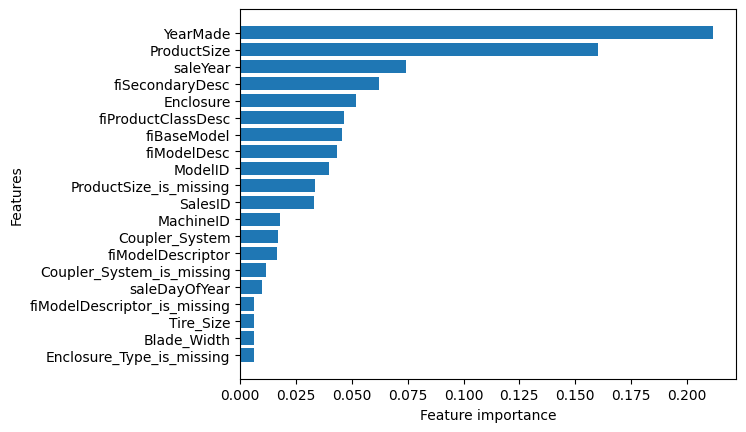

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_)